In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
ROOT_PATH='/content/drive/My Drive/Colab Notebooks/learning_ai'
sys.path.append(ROOT_PATH)

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import sys
ROOT_PATH='.'
sys.path.append(ROOT_PATH)

In [2]:
!pip install dlt

In [3]:
from common import config
config.GPU=True
from common.np import *
from common.base_model import BaseModel
from common.optimizer import *
from common.trainer import Trainer
import dlt
from common.util import to_cpu,to_gpu

data = dlt.cifar.load_cifar10()
x_train=data.train_images
x_test=data.test_images
t_train=data.train_labels
t_test=data.test_labels

x_train=x_train.transpose(0,3,1,2).astype('f')
x_test=x_test.transpose(0,3,1,2).astype('f')
t_train=t_train.reshape(t_train.shape[0])
t_test=t_test.reshape(t_test.shape[0])

if GPU:
    x_train=to_gpu(x_train)
    x_test=to_gpu(x_test)
    t_train=to_gpu(t_train)
    t_test=to_gpu(t_test)

x_train/=255.
x_test/=255.

input_shape=(3,32,32)

layer_list=[['conv',[64,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],
            ['conv',[64,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],
            ['conv',[128,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],
            ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['conv',[256,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]], ['relu',[]],
            ['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],['pool',[2,2,0,2]],
            ['conv',[512,3,3,1,1,2]], ['batchnorm',[0.9,None,None]],['relu',[]],
            ['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['conv',[512,3,3,1,1,2]],['batchnorm',[0.9,None,None]],['relu',[]],
            ['gap',[]],['affine',[10,2]], ['batchnorm',[0.9,None,None]],['relu',[]]]

loss_layer='softmax'

lr=0.001
max_epoch=20
batch_size=64
max_grad=None
eval_interval=100
eval_accuracy=True
eval_sample_num=1000
weight_decay=None
weight_decay_lambda=0
show_distribution=False
file_name=ROOT_PATH+'/pkl/base_cifar10/base_cifar10'

model=BaseModel(input_shape=input_shape,layer_list=layer_list,loss_layer=loss_layer,weight_decay=weight_decay,weight_decay_lambda=weight_decay_lambda,show_distribution=show_distribution)
for layer in model.layers:
    print(layer.__class__.__name__,layer.output_shape)
optimizer=Adam(lr)
trainer=Trainer(model,optimizer,file_name)

trainer.fit(x=x_train,t=t_train,x_test=x_test,t_test=t_test,max_epoch=max_epoch,batch_size=batch_size,max_grad=max_grad,eval_interval=eval_interval,eval_accuracy=eval_accuracy,eval_sample_num=eval_sample_num)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------

170500096/170498071 [==============================] - 4s 0us/step
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Convolution (64, 32, 32)
BatchNormalization (64, 32, 32)
Relu (64, 32, 32)
Pooling (64, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Convolution (128, 16, 16)
BatchNormalization (128, 16, 16)
Relu (128, 16, 16)
Pooling (128, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Convolution (256, 8, 8)
BatchNormalization (256, 8, 8)
Relu (256, 8, 8)
Pooling (256, 4, 4)
Convolution (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Convolution (512, 4, 4)
BatchNormalization (512, 4, 4)
Relu (512, 4, 4)
Convolution (512, 4, 4)
BatchNormalization (

In [ ]:
sys.path.append('/Users/user/.pyenv/versions/3.8.3/lib/python3.8/site-packages')

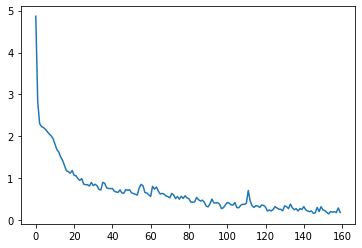

In [5]:
import matplotlib.pyplot as plt
import pickle

with open(ROOT_PATH+'/pkl/base_cifar10/base_cifar10_loss.pkl','rb') as f:
    loss_list=pickle.load(f)
    
train_loss_list=loss_list[0]
plt.plot(train_loss_list)
plt.show()

In [6]:
import matplotlib.pyplot as plt
import pickle

with open(ROOT_PATH+'/pkl/base_cifar10/base_cifar10_acc.pkl','rb') as f:
    acc_list=pickle.load(f)
    
train_acc_list=acc_list[0]
test_acc_list=acc_list[1]

plt.plot(train_acc_list)
plt.plot(test_acc_list)
plt.show()

ModuleNotFoundError: No module named 'cupy'